# Capstone Module 3: Travel Insurance Claim Prediction
by Anisha Ayu Putri Mayangsari

> ## Background <br>

Our company operates in the insurance industry, specifically in the travel business. The company provides various types of insurance for people's trip. The insurance itself provides protection for domestic and international trips. The amount of coverage depends on the trip itself and the insurance type customer is choosing. Basically the customer will purchase our insurance and they are eligible for insurance claim if they had problems with their trip which was covered by our product.

As a company, we need to understand which customer who will likely to do claim to ensure we are able to cover the claim and keep the business running. Using Machine Learning is one of the method to predict the insurance claim.

> ## Problem Statement <br>

The main problem is that the company needs to figure out if their business model is going to keep the company running or not. They need a profitable business system to be able to keep up in the industry. With this, our main objective is to evaluate and get the most profitable solution.

Assumption: currently all customers get the same price

To get the most profitable solution, we need to measure our possible risk. Our target is Claim/No Claim for each customer. Using the existing dataset, we have multiple customer data such as age, destination, product, and whether or not they claim. Using the confusion matrix, we can understand our risk better.

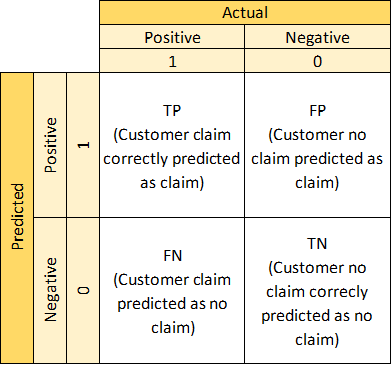

From the matrix, we can see there's two risk from False Positive and False Negative.
* False Positive
    * Customer no claim predicted as claim
    * The example is we expect Customer A to do claim, but they chose not to. This makes the company gain the full profit of the insurance product they sold.
    * The risk of incorrectly predicting this type is not reducing our profit, so in this case we will not focus to reduce this type of risk.
* False Negative
    * Customer claim predicted as no claim
    * The example is we expect Customer B to not do any claim, but they chose to file and receive the claim amount. This makes the company spend their balance to fulfill the claim amount.
    * The risk of incorrectly predicting this type is reducing our profit, because we need to pay the claim expense. This is a higher risk for our current problem, thus we are focusing to reduce this type of risk.

To produce a model that has a lower False Negative result, we can utilize Recall function and get a higher score for it. Using the formula, the lower our FN, the higher our Recall score.
\begin{equation}
Recall =\frac{TP}{TP+FN}
\end{equation}

To summarize, we want to get the most profitable solution using a model that focused on Recall scoring to reduce amount of FN.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_travel_insurance.csv')
df

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.00,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.00,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.70,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.00,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.00,28,No
...,...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,14,CHINA,30.0,0.00,36,Yes
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,NaN,17,AUSTRALIA,79.2,47.52,47,No
44325,TST,Travel Agency,Offline,Travel Cruise Protect,M,64,THAILAND,30.0,10.50,50,No
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,51,CHINA,36.0,0.00,36,No


**What kind of data do we have?** <br>
Before we do anything further to the data, we need to state our understanding of the data to avoid miscommunications. Thus, we need to carefully explain each columns in our dataset that contains 11 columns. <br>

**Numerical:**
1. **Duration**: Duration of travel. Assumption: in hour basis
1. **Net Sales**: Amount of sales of travel insurance policies.
1. **Commission (in value)**: Commission received for travel insurance agency.
1. **Age**: Age of insured.

**Categorical:**
1. **Agency**: Name of agency.
1. **Agency Type**: Type of travel insurance agencies.
1. **Distribution Channel**: Channel of travel insurance agencies.
1. **Product Name**: Name of the travel insurance products.
1. **Gender**: Gender of insured.
1. **Destination**: Destination of travel.
1. **Claim**: Claim status.

---

> ## Data Cleaning <br>
Before we do the cleaning, we will try to understand the data better. We can try to explore how the data works and decide whether it is usable for our use case or not. In this case, we can either fill in the data or drop the data based on the circumstances.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44328 entries, 0 to 44327
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                44328 non-null  object 
 1   Agency Type           44328 non-null  object 
 2   Distribution Channel  44328 non-null  object 
 3   Product Name          44328 non-null  object 
 4   Gender                12681 non-null  object 
 5   Duration              44328 non-null  int64  
 6   Destination           44328 non-null  object 
 7   Net Sales             44328 non-null  float64
 8   Commision (in value)  44328 non-null  float64
 9   Age                   44328 non-null  int64  
 10  Claim                 44328 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Gender                  31647
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Age                         0
Claim                       0
dtype: int64

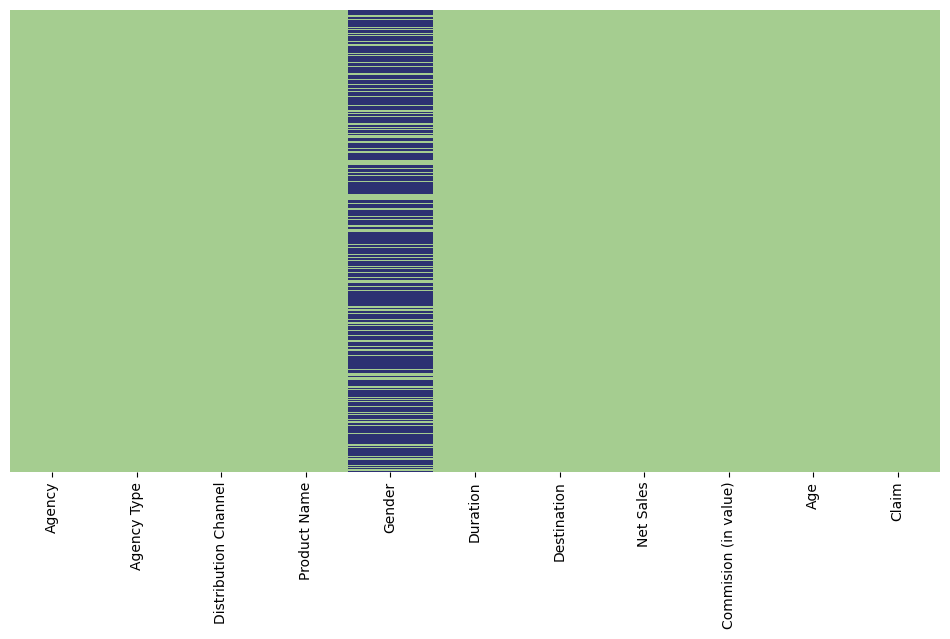

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isna(), cmap='crest', cbar=False, yticklabels=False);

Data Features

In [6]:
cfDesc = []
for i in df.columns:
    cfDesc.append(
        [
            i,
            df[i].dtypes,
            df[i].isna().sum(),
            round(df[i].isna().sum() / len(df) * 10, 2),
            df[i].nunique(),
            df[i].drop_duplicates().values
        ]
    )

pd.set_option("display.max_colwidth", 0)
pd.DataFrame(data=cfDesc, columns=["features", "DataType", "Null","Nullpercentage","Unique","Data"])

,features,DataType,Null,Nullpercentage,Unique,Data
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI, CWT, LWC, ART, CSR, SSI, RAB, KML, TST, TTW, JWT, ADM, CCR, CBH]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Cancellation Plan, Basic Plan, 2 way Comprehensive Plan, Bronze Plan, 1 way Comprehensive Plan, Rental Vehicle Excess Insurance, Single Trip Travel Protect Gold, Silver Plan, Value Plan, 24 Protect, Annual Travel Protect Gold, Comprehensive Plan, Ticket Protector, Travel Cruise Protect, Single Trip Travel Protect Silver, Individual Comprehensive Plan, Gold Plan, Annual Gold Plan, Child Comprehensive Plan, Premier Plan, Annual Travel Protect Silver, Single Trip Travel Protect Platinum, Annual Travel Protect Platinum, Spouse or Parents Comprehensive Plan, Travel Cruise Protect Family]"
4,Gender,object,31647,7.14,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[365, 4, 19, 20, 8, 2, 25, 90, 24, 43, 103, 376, 6, 16, 27, 34, 3, 14, 12, 31, 5, 7, 56, 29, 30, 58, 9, 38, 42, 11, 13, 40, 79, 370, 366, 26, 83, 55, 18, 100, 1, 35, 36, 75, 23, 73, 32, 232, 37, 10, 4736, 15, 17, 99, 173, 74, 82, 66, 156, 39, 95, 98, 111, 430, 53, 77, 87, 70, 151, 45, 54, 114, 118, 62, 28, 112, 326, 22, 59, 44, 21, 97, 63, 60, 51, 180, 160, 368, 65, 93, 71, 57, 0, 76, 69, 110, 146, 116, 129, 84, ...]"
6,Destination,object,0,0.00,138,"[SINGAPORE, MALAYSIA, INDIA, UNITED STATES, KOREA, REPUBLIC OF, THAILAND, GERMANY, JAPAN, INDONESIA, VIET NAM, AUSTRALIA, FINLAND, UNITED KINGDOM, SRI LANKA, SPAIN, HONG KONG, MACAO, CHINA, UNITED ARAB EMIRATES, IRAN, ISLAMIC REPUBLIC OF, TAIWAN, PROVINCE OF CHINA, POLAND, CANADA, OMAN, PHILIPPINES, GREECE, BELGIUM, TURKEY, BRUNEI DARUSSALAM, DENMARK, SWITZERLAND, NETHERLANDS, SWEDEN, MYANMAR, KENYA, CZECH REPUBLIC, FRANCE, RUSSIAN FEDERATION, PAKISTAN, ARGENTINA, TANZANIA, UNITED REPUBLIC OF, SERBIA, ITALY, CROATIA, NEW ZEALAND, PERU, MONGOLIA, CAMBODIA, QATAR, NORWAY, LUXEMBOURG, MALTA, LAO PEOPLE'S DEMOCRATIC REPUBLIC, ISRAEL, SAUDI ARABIA, AUSTRIA, PORTUGAL, NEPAL, UKRAINE, ESTONIA, ICELAND, BRAZIL, MEXICO, CAYMAN ISLANDS, PANAMA, BANGLADESH, TURKMENISTAN, BAHRAIN, KAZAKHSTAN, TUNISIA, IRELAND, ETHIOPIA, NORTHERN MARIANA ISLANDS, MALDIVES, SOUTH AFRICA, VENEZUELA, COSTA RICA, JORDAN, MALI, CYPRUS, MAURITIUS, LEBANON, KUWAIT, AZERBAIJAN, HUNGARY, BHUTAN, BELARUS, MOROCCO, ECUADOR, UZBEKISTAN, CHILE, FIJI, PAPUA NEW GUINEA, ANGOLA, FRENCH POLYNESIA, NIGERIA, MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF, NAMIBIA, GEORGIA, COLOMBIA, ...]"
7,Net Sales,float64,0,0.00,1006,"[216.0, 10.0, 22.0, 112.0, 16.0, 50.0, 78.0, 80.0, 40.0, 26.0, 252.85, 47.0, 25.0, 23.0, 20.0, 30.0, 42.0, 56.0, 19.8, 14.0, 29.7, 36.0, 31.0, 58.0, 9.9, 15.0, 21.0, 29.0, 32.0, 125.0, 48.0, 0.0, 21.04, 33.0, 204.6, 34.0, 30.55, 35.0, 49.5, 18.0, 98.0, 77.0, 69.3, 64.0, 0.32, 227.7, 48.5, -216.75, 24.0, 161.0, 99.0, 59.4, 45.0, 37.0, 44.0, 19.0, 75.0, 39.0, 17.55, -59.4, 51.0, -29.7, 80.25, 63.0, 12.0, 72.0, 53.0, 38.0, 17.0, 54.0, 69.0, 115.0, 76.3, 19.5, 29.5, 62.0, 11.0, 3.73, 79.0, 138.6, 22.5, 59.0, 5.59, 33.5, 53.25, 62.25, 93.0, -12.0, 1.03, 27.0, 56.5, 39.6, 28.0, 41.0, 97.0, 128.0, 43.0, 66.0, 26.5, 0.19, ...]"
8,Commision (in value),float64,0,0.00,915,"[54.0, 0.0, 7.7, 4.0, 9.1, 63.21, 10.5, 11.88, 17.82, 23.4, 7.5, 5.94, 43.75, 23.76, 7.36, 132.99, 9.57, 7.64, 12.25, 29.7, 6.3, 5.63, 41.58, 5.25, 0.09, 6.0, 136.62, 31.53, 54.19, 11.55, 10.15, 40.25, 59.4, 35.64, 15.75, 12.95, 28.5, 9.75, 4.39, 20.06, 18.0, 4.25, 19.07, 4.88, 7.38, 15.5, 1.05, 83.16, 14.7, 15.4, 1.57, 8.38, 13.31, 15.56, 0.29, 8.0, 36.73, 13.65, 20.3, 5.0, 10.0, 6.63, 0.05, 24.15, 29.05, 8.88, 14.0, 3.38, 15.88, 0.45, 10.89, 47.52, 0.37, 27.25, 18.13, 15.6, 70.2, 12.4, 72.94, 8.63, 4.63, 6.75, 11.25, 0.96, 53.46, 77.22, 1.13, 4.94, 1.73, 10.38, 58.45, 23.5, 6.94, 6.13, 41.42, 17.5, 13.16, 0.14, 3.23, 15.93, ...]"
9,Age,int64,0,0.00,89,"[57, 33, 26, 59, 28, 36, 22, 

In [7]:
display(df.describe(include='O'),df.describe())

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Destination,Claim
count,44328,44328,44328,44328,12681,44328,44328
unique,16,2,2,26,2,138,2
top,EPX,Travel Agency,Online,Cancellation Plan,M,SINGAPORE,No
freq,24656,32113,43572,12979,6504,9267,43651


,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


### Define Target Column

Our target column is still categorized as Yes and No. We will change this format into 1 (yes) and 0 (no).

In [8]:
df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,0


### Data Handling: Missing Value in Gender

Currently we can see above that the missing value in 'Gender' column is outstanding. There's more missing column than the filled column. There is currently no way from the existing columns to determine the gender such as Name, Mr/Mrs. Thus we can conclude that we can drop the 'Gender' column instead of removing the rows that has missing values. If we remove the rows, we might lose most of our data.

In [9]:
df.drop(columns=['Gender'], inplace=True)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


### Data Handling: Age exceeding 100 years old.

Usually, in our current society, old people doesn't tend to travel a lot. Interestingly on this data, we have 676 people with the age of 118 who travels. There's even no age between 88 and 118 who travels and this makes it odd for people with 118 years of age to travel. Since we are unable to get the actual age for the odd data, we can drop the rows that has age 118.

In [10]:
df[df['Age']>80]['Age'].value_counts()

Age
118    676
81     17 
84     15 
83     11 
82     11 
87     6  
86     4  
85     4  
88     3  
Name: count, dtype: int64

In [11]:
df.drop(df[df['Age']>100].index, inplace=True)
df['Age'].describe()

count    43652.000000
mean     38.716531   
std      10.094275   
min      0.000000    
25%      35.000000   
50%      36.000000   
75%      42.000000   
max      88.000000   
Name: Age, dtype: float64

### Data Handling: Duration below 0

In traveling, the duration incurred from we board and land is recorded on the 'Duration' column. It is impossible to have duration below zero. We will assume that the zero duration is for trips that took time less than an hour so it's still making sense. Thus we will only drop the duration of -1.

In [12]:
df[df['Duration']<1]['Duration'].value_counts()

Duration
0    29
Name: count, dtype: int64

In [13]:
df.drop(df[df['Duration']<0].index, inplace=True)
df['Duration'].describe()

count    43652.000000
mean     49.736369   
std      109.882072  
min      0.000000    
25%      9.000000    
50%      22.000000   
75%      53.000000   
max      4881.000000 
Name: Duration, dtype: float64

### Data Handling: Duplicate

We need to remove our duplicate data because it will give incorrect input for our model. Usually, each transaction is unique and the chance of the same data appearing twice is unlikely. It is most likely a mistake in data entry and we should handle it by removing the data. We took the risk of losing 10% of our data compared to the risk of using them for an incorrect model.

In [14]:
print('Duplicated row', df.duplicated().sum())
print('Duplicated row compared to total row',df.duplicated().sum()/len(df)*100,'%')

Duplicated row 4751
Duplicated row compared to total row 10.883808302025107 %


In [15]:
df.drop_duplicates(inplace=True)
df

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.00,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.00,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.70,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.00,28,0
...,...,...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,Online,2 way Comprehensive Plan,14,CHINA,30.0,0.00,36,1
44324,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,47,0
44325,TST,Travel Agency,Offline,Travel Cruise Protect,64,THAILAND,30.0,10.50,50,0
44326,EPX,Travel Agency,Online,2 way Comprehensive Plan,51,CHINA,36.0,0.00,36,0


### Used Data

Below is the data information we have after cleaning process to ensure the data is ready.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38901 entries, 0 to 44327
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                38901 non-null  object 
 1   Agency Type           38901 non-null  object 
 2   Distribution Channel  38901 non-null  object 
 3   Product Name          38901 non-null  object 
 4   Duration              38901 non-null  int64  
 5   Destination           38901 non-null  object 
 6   Net Sales             38901 non-null  float64
 7   Commision (in value)  38901 non-null  float64
 8   Age                   38901 non-null  int64  
 9   Claim                 38901 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 3.1+ MB


---

> ## Data Analysis & Preparation (Feature Selection & Engineering)

Our aim is to predict customer that will likely do insurance claim for their trip. We want to ensure that our selling price is higher compared to that claim numbers to make profits and keep the business to go on. We need to see from bird-eye perspective from our data, is there any certain pattern in our customer who do claim and who don't do claim. From this we can choose what variables to use for our model.

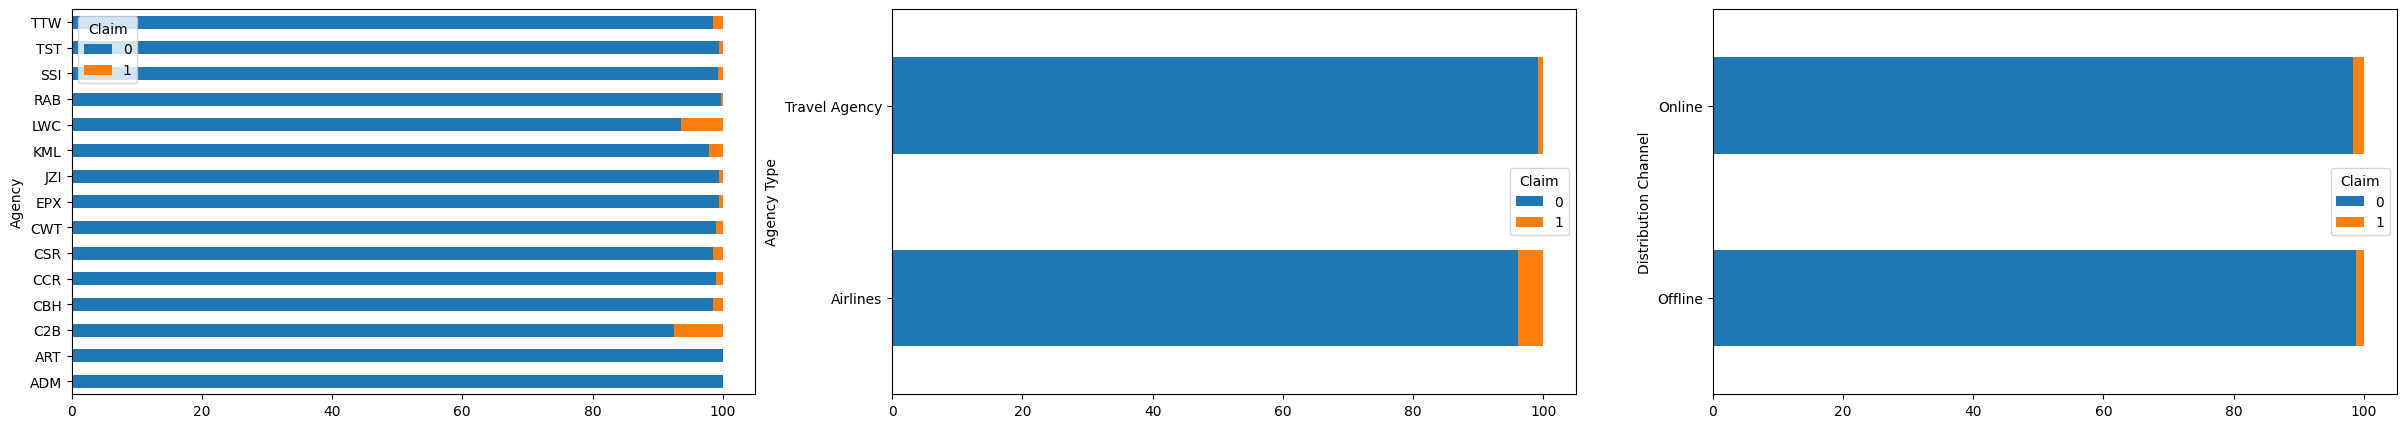

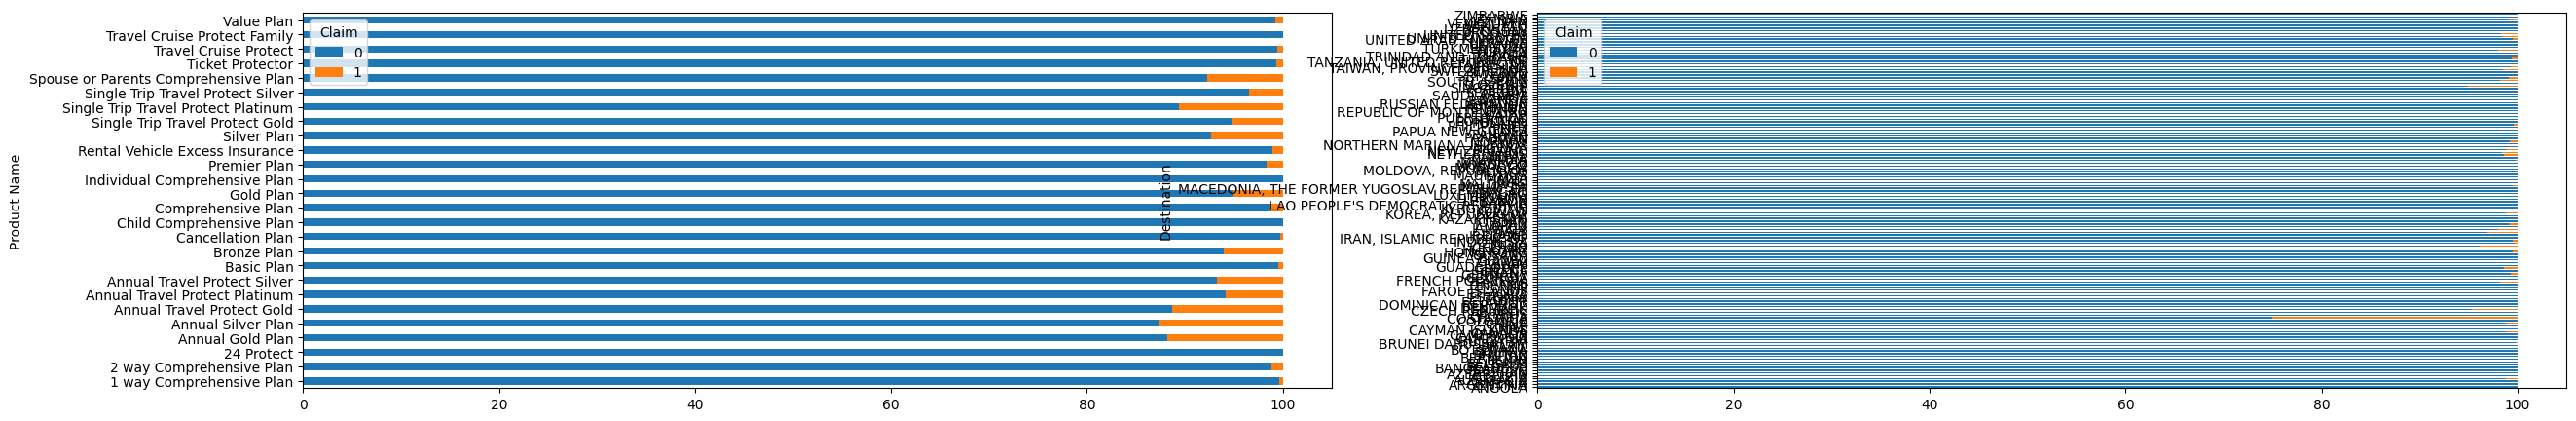

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))

(pd.crosstab(index=df['Agency'], columns=df['Claim'], normalize='index')*100).plot.barh(stacked=True, ax=axes[0])
(pd.crosstab(index=df['Agency Type'], columns=df['Claim'], normalize='index')*100).plot.barh(stacked=True, ax=axes[1])
(pd.crosstab(index=df['Distribution Channel'], columns=df['Claim'], normalize='index')*100).plot.barh(stacked=True, ax=axes[2])

fig, axes = plt.subplots(1, 2, figsize=(30, 5))
(pd.crosstab(index=df['Product Name'], columns=df['Claim'], normalize='index')*100).plot.barh(stacked=True, ax=axes[0])
(pd.crosstab(index=df['Destination'], columns=df['Claim'], normalize='index')*100).plot.barh(stacked=True, ax=axes[1])

plt.show()


For categorical data as above, we can see that:
1. Some *Agency* tends to have higher claim rates than the other
1. Airline *Agency Type* tends to have higher claim than Travel Agency
1. *Online* customers mostly do the claim
1. There's different numbers of claim rates based on *Product Name*
1. There's also many different numbers of claim rate for each *Destination*

With this, there's no stagnant numbers for each of the variables mentioned. We can use all of them for our model to predict which customer tends to do claim based on our historical data. But, we can also see that our data especially in Agency, Agency Type & Distribution Channel are very imbalanced.

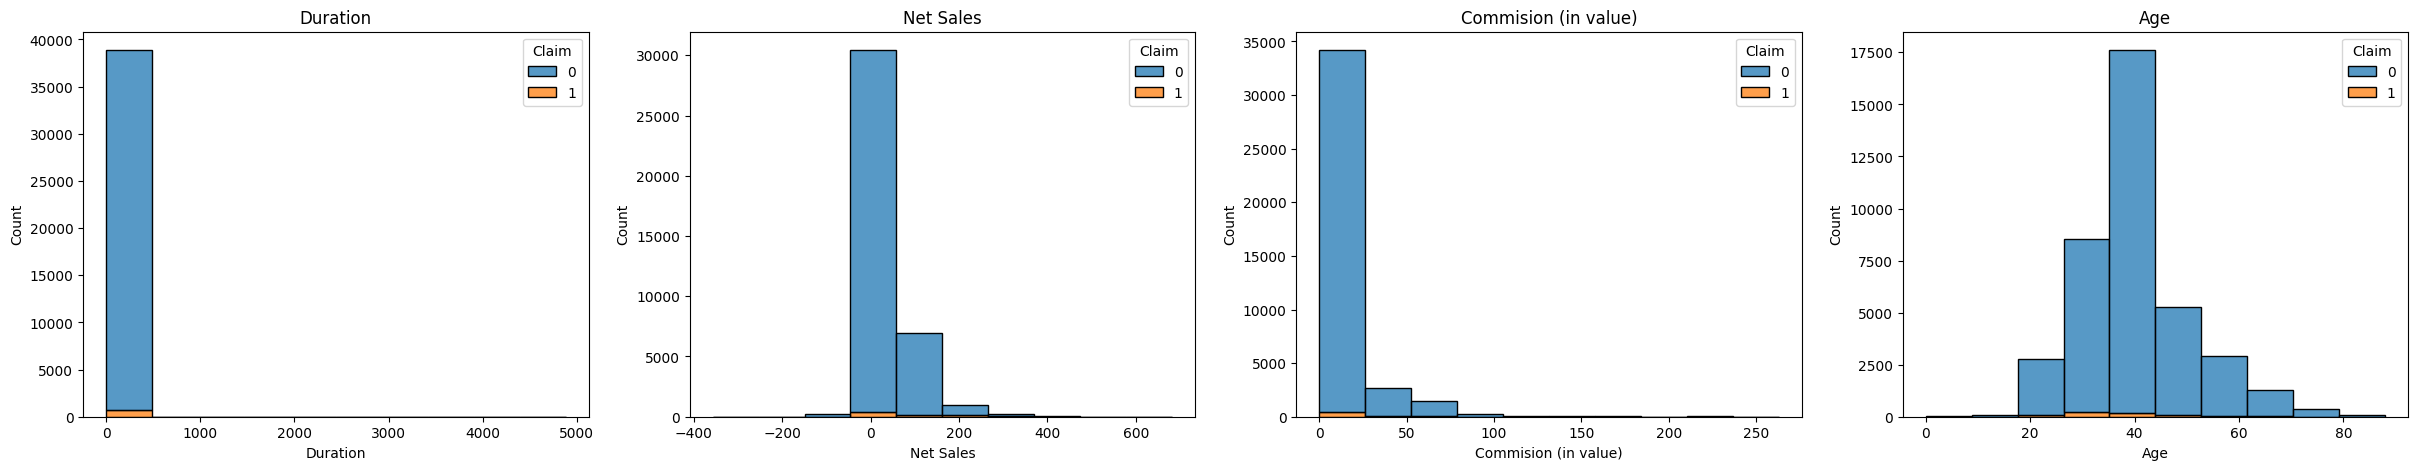

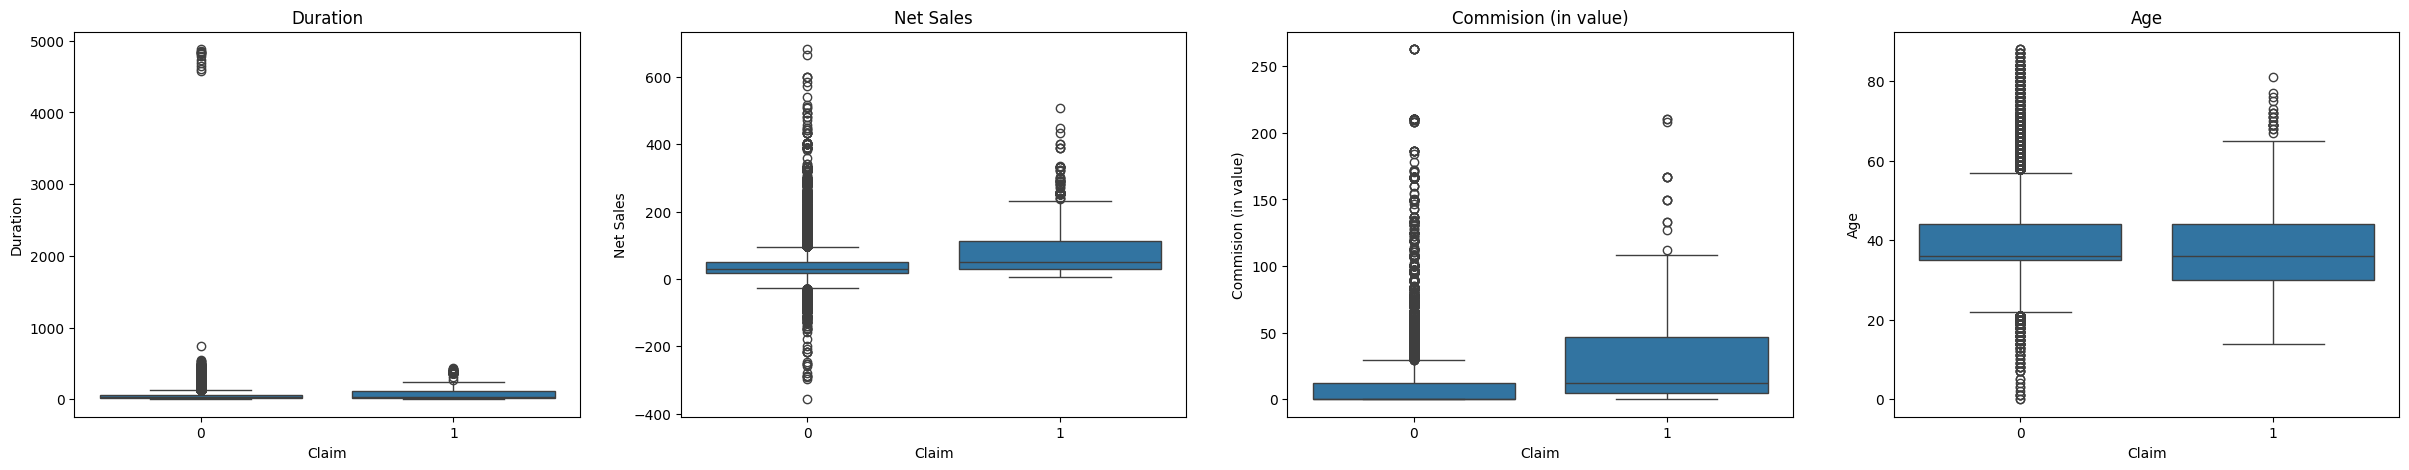

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(30, 5))

sns.histplot(data=df, x='Duration', hue='Claim', bins=10, kde=False, multiple='stack',ax=axes[0], )
axes[0].set_title("Duration")

sns.histplot(data=df, x='Net Sales', hue='Claim', bins=10, kde=False,multiple='stack', ax=axes[1])
axes[1].set_title("Net Sales")

sns.histplot(data=df, x='Commision (in value)', hue='Claim', bins=10, kde=False, multiple='stack',ax=axes[2])
axes[2].set_title("Commision (in value)")

sns.histplot(data=df, x='Age', hue='Claim', kde=False, bins=10, multiple='stack',ax=axes[3])
axes[3].set_title("Age")

###

fig, axes = plt.subplots(1, 4, figsize=(30, 5))

sns.boxplot(data=df, y='Duration', x='Claim', ax=axes[0])
axes[0].set_title("Duration")

sns.boxplot(data=df, y='Net Sales', x='Claim', ax=axes[1])
axes[1].set_title("Net Sales")

sns.boxplot(data=df, y='Commision (in value)', x='Claim', ax=axes[2])
axes[2].set_title("Commision (in value)")

sns.boxplot(data=df, y='Age', x='Claim', ax=axes[3])
axes[3].set_title("Age");


For numerical data as above, we can see that generally there are many outliers on our data. Net Sales and Age has most outlier by boxplot chart observation, they have both upper and lower bounds outlier. Compared to Duration and Commision, they both mostly had outler on the upper bound area. But, all of them are mostly imbalanced. We can barely see the orange hue for Claim. However, since our data is looking very imbalanced, we don't want to risk dropping our targeted data. Our data is also based on actual sales data, so it is still possible to have big ranges of data.

For this case, we are going to try binning our numerical data for Net Sales and Age (the ones with most data outlier by boxplot) to try improve our dataset. It also adds more interpretability for our business users, binning them into meaningful groups or bins can make the variable easier to understand.

> Recategorizing numerical variables in a dataset can improve predictive models and evaluation strategies in imbalanced domains. (Sadouk, L., Gadi, T., & Essoufi, E. (2021). A novel cost‐sensitive algorithm and new evaluation strategies for regression in imbalanced domains. Expert Systems, 38. https://doi.org/10.1111/exsy.12680.)

### Data Binning

Based on our findings above, we are going to bin Net Sales and Age with the appropriate grouping. For new testing data, it is essential to be transformed with this binning first.


In [19]:
df["Net Sales Category"] = pd.cut(
    df["Net Sales"],
    bins=[-float("inf"), 0, 100, 400, float("inf")],
    labels=["Discount", "Low Sales", "General Sales", "High Sales"],
)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Net Sales Category
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0,General Sales
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0,Low Sales
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0,Low Sales
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0,General Sales
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0,Low Sales


>For a $5,000 trip, the average travel insurance cost is $228, and the range of rates is from $154 for a basic policy up to $437 for a policy with generous coverage.<br>
Source: https://www.forbes.com/advisor/travel-insurance/average-travel-insurance-cost/

Thus based on the insurance price range of 154 - 437, we are using <0 for discounted sales, 0-100 for low sales, 100-400 for general sales, and >400 for high sales.

In [20]:
pd.crosstab(index=df['Net Sales Category'], columns=df['Claim'], normalize='index')*100

Claim,0,1
Net Sales Category,,
Discount,100.000000,0.000000
Low Sales,98.607396,1.392604
General Sales,93.338161,6.661839
High Sales,91.891892,8.108108


In [21]:
df["Age Category"] = pd.cut(
    df["Age"],
    bins=[-1, 10, 26, 42, 58, 77, float("inf")],
    labels=["Gen Alpha", "Gen Z", "Millenial", "Gen X", "Baby Boomer", "Silent Gen"],
)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Net Sales Category,Age Category
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0,General Sales,Gen X
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0,Low Sales,Millenial
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0,Low Sales,Gen Z
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0,General Sales,Baby Boomer
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0,Low Sales,Millenial


In [22]:
df[df['Age']<1]

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Net Sales Category,Age Category
37815,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,-30.0,10.5,0,0,Discount,Gen Alpha
44319,TST,Travel Agency,Offline,Travel Cruise Protect,94,THAILAND,30.0,10.5,0,0,Low Sales,Gen Alpha


> Assuming our Age data is valid for this year, we grouped them based on their generations.
Source: https://libguides.usc.edu/busdem/age

In [23]:
pd.crosstab(index=df['Age Category'], columns=df['Claim'], normalize='index')*100

Claim,0,1
Age Category,,
Gen Alpha,100.000000,0.000000
Gen Z,97.015986,2.984014
Millenial,98.419080,1.580920
Gen X,98.358190,1.641810
Baby Boomer,98.076923,1.923077
Silent Gen,99.180328,0.819672


> ## Data Preprocessing

With our cleaned data, we are ready to preprocess them before using them in the model. We will use multiple methods to transform our categorical data into numerical.
1. Label/Ordinal Encoder
    - Used for data that has order and it's important to keep the sequence as it is.
    - We use this to transform column: Net Sales Category, Age Category
1. Binary Encoder
    - Used for data that has high numbers of category. This encoder will work faster than transforming the variables into One Hot. The variable will be transformed into binary numbers and translated into columns.
    - We use this to transform column: Destination, Product Name
1. One Hot Encoder
    - This categorical data encoding can be used when the features do not have any order. The features will be mapped into multiple columns, subject to its unique variable numbers. We will also use drop first to reduce the complexity in our model.
    - We use this to transform column: Agency, Agency Type, Distribution Channel

Other than the encoder, we will also apply Robust Scaler for Duration and Commision (in value) variable. Robust Scaler is used due to both data not showing a normal distribution. We will not apply this for Age & Net Sales since we will drop them and use the categorized version instead.

In [24]:
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim', 'Net Sales Category', 'Age Category'],
      dtype='object')

In [25]:
ordinal_map_1 = [
    {
        "col": "Net Sales Category",
        "mapping": {"Discount": 0, "Low Sales": 1, "General Sales": 2, "High Sales": 3},
    }
]

ordinal_map_2 = [
    {
        "col": "Age Category",
        "mapping": {'Gen Alpha':5,'Gen Z':4,'Millenial':3,'Gen X':2,'Baby Boomer':1,'Silent Gen':0},
    }
]

transformer = ColumnTransformer([
    ('ordinal1', ce.OrdinalEncoder(mapping= ordinal_map_1), ['Net Sales Category']),
    ('ordinal2', ce.OrdinalEncoder(mapping= ordinal_map_2), ['Age Category']),
    ('binary', ce.BinaryEncoder(), ['Destination', 'Product Name']),
    ('onehot', OneHotEncoder(drop='first'), ['Agency', 'Agency Type', 'Distribution Channel']),
    ('scaler',RobustScaler(),['Duration','Commision (in value)'])
], remainder='passthrough')

In [26]:
x = df.drop(columns=["Claim", "Age", "Net Sales"])
y = df["Claim"]

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.2, random_state=2024
)

Using stratify to ensure our data splitting is keeping the same proportion for Claim/No Claim data.

In [27]:
x_train_prep = transformer.fit_transform(x_train)
column_prep = transformer.get_feature_names_out()

x_train_prep = pd.DataFrame(data=x_train_prep, columns=column_prep)
display(x_train_prep, x_train_prep.columns)

,ordinal1__Net Sales Category,ordinal2__Age Category,binary__Destination_0,binary__Destination_1,binary__Destination_2,binary__Destination_3,binary__Destination_4,binary__Destination_5,binary__Destination_6,binary__Destination_7,...,onehot__Agency_KML,onehot__Agency_LWC,onehot__Agency_RAB,onehot__Agency_SSI,onehot__Agency_TST,onehot__Agency_TTW,onehot__Agency Type_Travel Agency,onehot__Distribution Channel_Online,scaler__Duration,scaler__Commision (in value)
0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.708108,4.808923
1,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.313514,0.000000
2,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.518919,0.000000
3,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.345946,0.000000
4,1.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.086486,1.683502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31115,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.172973,0.000000
31116,1.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.237838,0.000000
31117,1.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.778378,0.000000
31118,1.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.713514,0.000000


Index(['ordinal1__Net Sales Category', 'ordinal2__Age Category',
       'binary__Destination_0', 'binary__Destination_1',
       'binary__Destination_2', 'binary__Destination_3',
       'binary__Destination_4', 'binary__Destination_5',
       'binary__Destination_6', 'binary__Destination_7',
       'binary__Product Name_0', 'binary__Product Name_1',
       'binary__Product Name_2', 'binary__Product Name_3',
       'binary__Product Name_4', 'onehot__Agency_ART', 'onehot__Agency_C2B',
       'onehot__Agency_CBH', 'onehot__Agency_CCR', 'onehot__Agency_CSR',
       'onehot__Agency_CWT', 'onehot__Agency_EPX', 'onehot__Agency_JZI',
       'onehot__Agency_KML', 'onehot__Agency_LWC', 'onehot__Agency_RAB',
       'onehot__Agency_SSI', 'onehot__Agency_TST', 'onehot__Agency_TTW',
       'onehot__Agency Type_Travel Agency',
       'onehot__Distribution Channel_Online', 'scaler__Duration',
       'scaler__Commision (in value)'],
      dtype='object')

Our transformed feature columns look like the data above. Now we can use this data for our modelling. All of the data has been transformed using encoder and scaler to ensure categorical variables had been translated into numerical and numerical variables had been scaled.

---

> ## Model Benchmarking - Without Imbalance Handling

First off, we are going to use our transformed data as it is for modelling. This is the first model benchmark to see which model performs better and we will use that for our hyperparameter tuning to try and improve the performance.

We are going to use the recall scoring method. As explained above, our circumstances has more risk on our False Negative prediction. Thus, we can utilize recall score that will be nearing 1, if there's less False Negative prediction.

In [28]:
logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2024)
rf = RandomForestClassifier(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
gb = GradientBoostingClassifier(random_state=2024)
xgb = XGBClassifier()

model = [logreg,knn,tree,rf,ada,gb,xgb]
score = []
score_mean = []
score_std = []
score_data = []
result_model = []

for i in model:
    skfold = StratifiedKFold(n_splits=5)
    estimator = Pipeline([
        ('transformer',transformer),
        ('model',i)])
    model_cv = cross_val_score(estimator, x_train, y_train, cv=skfold, scoring='recall')
    
    result_model.append(str(i).split('(')[0])
    score_mean.append(model_cv.mean())
    score_std.append(model_cv.std())
    score_data.append(model_cv.round(2))
    
benchmark_1 = pd.DataFrame({
    'Model' : result_model,
    'Score Recall' : score_mean,
    'Score Std' : score_std,
    'Score Data' : score_data
    }).sort_values(by='Score Recall',ascending=False)
benchmark_1

,Model,Score Recall,Score Std,Score Data
2,DecisionTreeClassifier,0.065685,0.015726,"[0.04, 0.07, 0.08, 0.07, 0.08]"
3,RandomForestClassifier,0.026309,0.011045,"[0.01, 0.02, 0.03, 0.04, 0.04]"
6,XGBClassifier,0.007477,0.006994,"[0.01, 0.02, 0.01, 0.0, 0.0]"
1,KNeighborsClassifier,0.003774,0.007547,"[0.0, 0.0, 0.0, 0.02, 0.0]"
0,LogisticRegression,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
4,AdaBoostClassifier,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"
5,GradientBoostingClassifier,0.000000,0.000000,"[0.0, 0.0, 0.0, 0.0, 0.0]"


In [29]:
# Modelling
tree = DecisionTreeClassifier(random_state=2024)
skfold = StratifiedKFold(n_splits=5)
model = Pipeline([("transformer", transformer),
                  ("model", tree)])

model.fit(x_train, y_train)

# Model prediction in Test Set
y_pred_bm1 = model.predict(x_test)
print("Classification Report \n", classification_report(y_test, y_pred_bm1))
print("Recall Score", recall_score(y_test, y_pred_bm1))

Classification Report 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      7648
           1       0.01      0.01      0.01       133

    accuracy                           0.97      7781
   macro avg       0.50      0.50      0.50      7781
weighted avg       0.97      0.97      0.97      7781

Recall Score 0.007518796992481203


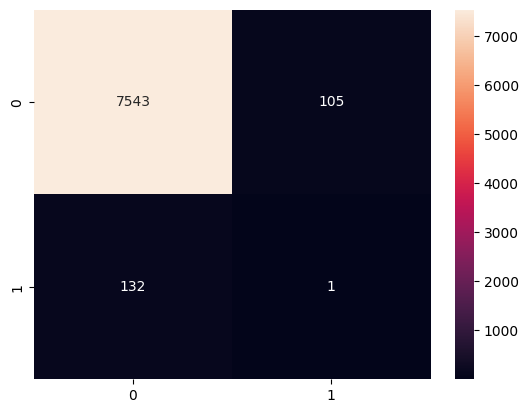

In [30]:
sns.heatmap(confusion_matrix(y_test, y_pred_bm1), annot=True, fmt='.4g');

---

> ## Model Benchmarking - With Imbalance Handling

We can see from the figures below that our data is extremely unbalanced. There's only 1.7% of people who had done claim. The imbalance is causing our model to have a very low recall score. This makes us turn into using multiple resampler method such as Random Under Sampler, Nearmiss, Random Over Sampler, and SMOTE.
1. **Random Under Sampler**<br>
    RUS method deletes our majority class in random ways so that it matches the minority class proportion. This method has a big risk of losing information from our data, especially if our dataset is small. In this case, our insurace dataset is moderate size (38k rows), thus we can try to use this method.<br>
    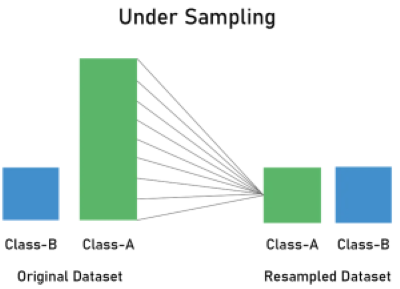
    
1. **Random Over Sampler**<br>
    ROS method adds copies on our minority class in random ways so that it matches the majority class proportion. This method is quite risky in overfitting. Since we are comparing our model, we can use this method too as a comparison.<br>
    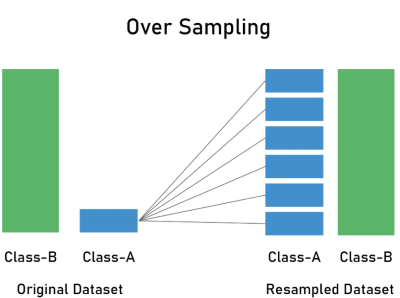
    
1. **Near Miss**<br>
    NearMiss method is used to balance the class distribution by selecting several majority class instances that is near minority class. We are using sampling_strategy = 'majority' to focus keeping majority class instance that is close to minority class.<br>
    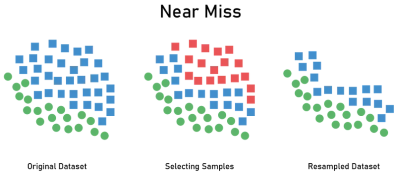

1. **SMOTE**<br>
    SMOTE or Synthetic Minority Over-sampling Technique is a method that generates synthetic samples for the minority class and oversampling them to balance the class distribution. This method tries to avoid overfitting that copies the data instead of creating synthetic sample.<br>
    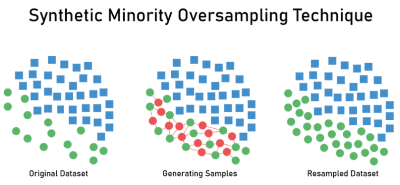

> Illustration Source: https://heartbeat.comet.ml/resampling-to-properly-handle-imbalanced-datasets-in-machine-learning-64d82c16ceaa

We are going to try out those 4 resampler methods to our model and find out which one performs the best.

In [31]:
df['Claim'].value_counts()/len(df)*100

Claim
0    98.287962
1    1.712038 
Name: count, dtype: float64

In [32]:
logreg = LogisticRegression(solver='liblinear')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=2024)
rf = RandomForestClassifier(random_state=2024)
ada = AdaBoostClassifier(random_state=2024)
gb = GradientBoostingClassifier(random_state=2024)
xgb = XGBClassifier()

ros = RandomOverSampler(random_state=2024)
rus = RandomUnderSampler(random_state=2024)
smote = SMOTE(random_state=2024)
nearmiss = NearMiss(sampling_strategy='majority')

model = [logreg,knn,tree,rf,ada,gb,xgb]
resampler = [ros, smote, nearmiss, rus]
score_mean = []
score_std = []
score_data = []
result_model = []
result_resampler = []

for i in model:
    for j in resampler:
        skfold=StratifiedKFold(n_splits=5)
        estimator=Pipeline([
            ('preprocess',transformer),
            ('resampler', j),
            ('model',i)])
        model_cv=cross_val_score(estimator,x_train,y_train,cv=skfold,scoring='recall')
        
        result_model.append(str(i).split('(')[0])
        result_resampler.append(str(j).split('(')[0])
        score_mean.append(model_cv.mean())
        score_std.append(model_cv.std())
        score_data.append(model_cv.round(2))
    
benchmark_2 = pd.DataFrame({
    'Model' : result_model,
    'Resampler' : result_resampler,
    'Score Recall' : score_mean,
    'Score Std' : score_std,
    'Score Data' : score_data
    }).sort_values(by='Score Recall',ascending=False)
benchmark_2

,Model,Resampler,Score Recall,Score Std,Score Data
14,RandomForestClassifier,NearMiss,0.872421,0.043018,"[0.81, 0.92, 0.89, 0.92, 0.83]"
26,XGBClassifier,NearMiss,0.870587,0.039698,"[0.8, 0.93, 0.86, 0.89, 0.88]"
22,GradientBoostingClassifier,NearMiss,0.851843,0.038354,"[0.79, 0.88, 0.86, 0.9, 0.84]"
10,DecisionTreeClassifier,NearMiss,0.846077,0.038116,"[0.81, 0.9, 0.87, 0.86, 0.79]"
18,AdaBoostClassifier,NearMiss,0.844243,0.049110,"[0.77, 0.9, 0.89, 0.86, 0.81]"
6,KNeighborsClassifier,NearMiss,0.786087,0.040510,"[0.73, 0.82, 0.82, 0.81, 0.75]"
7,KNeighborsClassifier,RandomUnderSampler,0.728002,0.029344,"[0.72, 0.71, 0.73, 0.7, 0.78]"
15,RandomForestClassifier,RandomUnderSampler,0.714936,0.042369,"[0.71, 0.71, 0.66, 0.7, 0.79]"
3,LogisticRegression,RandomUnderSampler,0.705484,0.051243,"[0.74, 0.74, 0.62, 0.68, 0.75]"
23,GradientBoostingClassifier,RandomUnderSampler,0.694146,0.049222,"[0.74, 0.75, 0.62, 0.66, 0.71]"


In [33]:
# Modelling
rf = RandomForestClassifier(random_state=2024)
skfold=StratifiedKFold(n_splits=5)
resampler=NearMiss(sampling_strategy='majority')
model=Pipeline([
    ('transformer',transformer),
    ('resampler', resampler),
    ('model',rf)])

model.fit(x_train, y_train)

# Model prediction in Test Set
y_pred_bm2 = model.predict(x_test)
print('Classification Report \n',classification_report(y_test, y_pred_bm2))
print('Recall Score',recall_score(y_test, y_pred_bm2))

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.04      0.07      7648
           1       0.02      0.86      0.03       133

    accuracy                           0.05      7781
   macro avg       0.48      0.45      0.05      7781
weighted avg       0.92      0.05      0.07      7781

Recall Score 0.8646616541353384


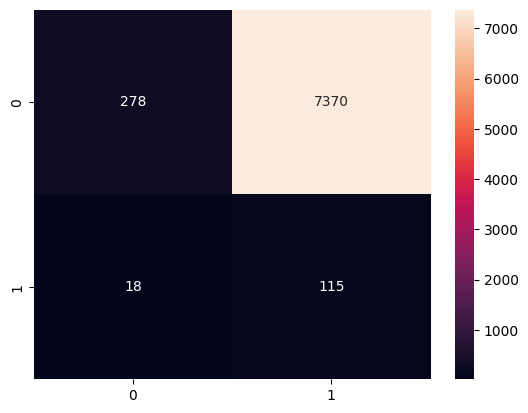

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred_bm2), annot=True, fmt='.4g');

* Comparing our train and test data, we observe a little difference. Our recall score in train data is 87% and in test data is 86%. The difference is still < 5%, meaning that our current model is stil fit even though there's a slight difference.
* From the confusion matrix, we can see that there's still 18 FN predictions. We can try to improve this using hyperparameter tuning.

### Random Forest Classifier
To understand better on our chosen model, random forest classifier is one of ensemble method in supervised machine learning. This method creates multiple bootstrap samples and from each it make tree model with feature randomization. The final prediction result is determined from majority vote. This model is helping to overcome overfit model in Decision Tree.

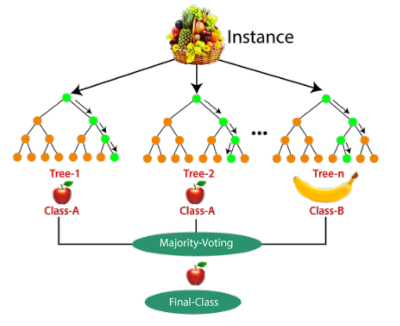

> Picture Source: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

---

> ## Hyperparameter Tuning

Hyperparameter tuning is used to find out the best parameter for our model to try and improve the model's performance. We're using the Random Forest Model as it has the best performance out of all models we had tried above. The parameters we're considering to tune are:
- Max depth
- Min samples split
- Min samples leaf
- n_estimators
- Criterion

> Note: Previously, we had tried using Grid Search with 118k iteratio nwhich could give us a better result in finding the best parameters. However the process took too long (> 3 hours) and we decided to use smaller range of hyperparameter, but doing the process twice to ensure we get the best hyperparameter score.

### 1st Tuning

In [35]:
rf = RandomForestClassifier(random_state=2024)
skfold=StratifiedKFold(n_splits=5)
resampler=NearMiss(sampling_strategy='majority')
estimator=Pipeline([
    ('transformer',transformer),
    ('resampler', resampler),
    ('model',rf)])

hyperparam = {
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2,5,10],
    "model__min_samples_leaf": [1,2,3],
    "model__n_estimators": [50,100,150],
    "model__criterion": ['gini','entropy']
}

grid_search = GridSearchCV(
    estimator,
    param_grid=hyperparam,
    scoring="recall",
    cv=skfold,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print("best parameter: ", grid_search.best_params_)
print("best score mean: ", grid_search.best_score_)

best parameter:  {'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 150}
best score mean:  0.8761946746605537


In [36]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False).head(3)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
137,1.437325,0.097249,0.276805,0.018426,entropy,20,1,2,150,"{'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 150}",0.813084,0.915888,0.88785,0.924528,0.839623,0.876195,0.043285,1
136,1.161888,0.032691,0.186582,0.028692,entropy,20,1,2,100,"{'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}",0.813084,0.915888,0.88785,0.915094,0.839623,0.874308,0.041297,2
83,1.491495,0.200687,0.288382,0.069356,entropy,None,1,2,150,"{'model__criterion': 'entropy', 'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 150}",0.813084,0.915888,0.88785,0.924528,0.830189,0.874308,0.045009,2


### 2nd Tuning

In [37]:
rf = RandomForestClassifier(random_state=2024)
skfold=StratifiedKFold(n_splits=5)
resampler=NearMiss(sampling_strategy='majority')
estimator=Pipeline([
    ('transformer',transformer),
    ('resampler', resampler),
    ('model',rf)])

hyperparam = {
    "model__max_depth": [20, 30, 40],
    "model__min_samples_split": [2,5,10],
    "model__min_samples_leaf": [1,2,3],
    "model__n_estimators": [150, 175, 200, 225, 250],
    "model__criterion": ['gini','entropy']
}

grid_search2 = GridSearchCV(
    estimator,
    param_grid=hyperparam,
    scoring="recall",
    cv=skfold,
    n_jobs=-1
)

grid_search2.fit(x_train, y_train)

print("best parameter: ", grid_search2.best_params_)
print("best score mean: ", grid_search2.best_score_)

best parameter:  {'model__criterion': 'gini', 'model__max_depth': 30, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 175}
best score mean:  0.8761946746605537


In [38]:
pd.DataFrame(grid_search2.cv_results_).sort_values(by='mean_test_score', ascending=False).head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
135,1.630898,0.367626,0.305215,0.079378,entropy,20,1,2,150,"{'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 150}",0.813084,0.915888,0.88785,0.924528,0.839623,0.876195,0.043285,1
136,1.731068,0.173576,0.372890,0.033727,entropy,20,1,2,175,"{'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 175}",0.813084,0.915888,0.88785,0.924528,0.839623,0.876195,0.043285,1
91,1.516350,0.010558,0.321445,0.020447,gini,40,1,2,175,"{'model__criterion': 'gini', 'model__max_depth': 40, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 175}",0.813084,0.915888,0.88785,0.924528,0.839623,0.876195,0.043285,1


The 2nd tuning parameters are taken from the nearest numbers of the best parameters of the 1st tuning. Turns out, the result of mean recall score is still the same with the 1st tuning result. Thus, we're going to use the first tuning result to calculate our test dataset performance.

### Test Set Performance: Best Model

In [39]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

y_pred_bm3 = best_model.predict(x_test)
print('Classification Report \n',classification_report(y_test, y_pred_bm3))
print('Recall Score',recall_score(y_test, y_pred_bm3))

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.04      0.07      7648
           1       0.02      0.87      0.03       133

    accuracy                           0.05      7781
   macro avg       0.48      0.45      0.05      7781
weighted avg       0.93      0.05      0.07      7781

Recall Score 0.8721804511278195


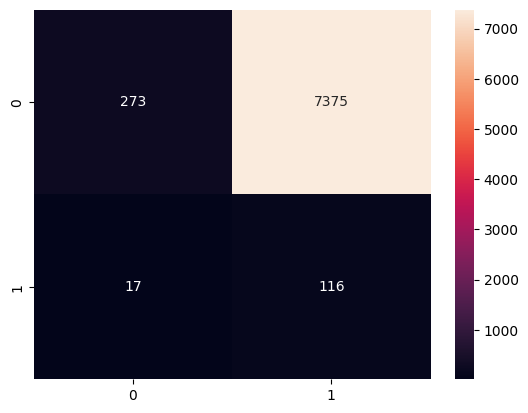

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred_bm3), annot=True, fmt='.4g');

* Comparing our train and test data, we observe a smaller difference compared to our model before tuning. Now, our recall score in train data is 87% and in test data is 87%. This makes our model is relatively stable compared to the previous one.
* From the confusion matrix, we can see that there's been a reduction in FN from 18 into 17 FN predictions.

---

> ## Feature Importance

Feature importance is used to see which variable contributes more in our model.

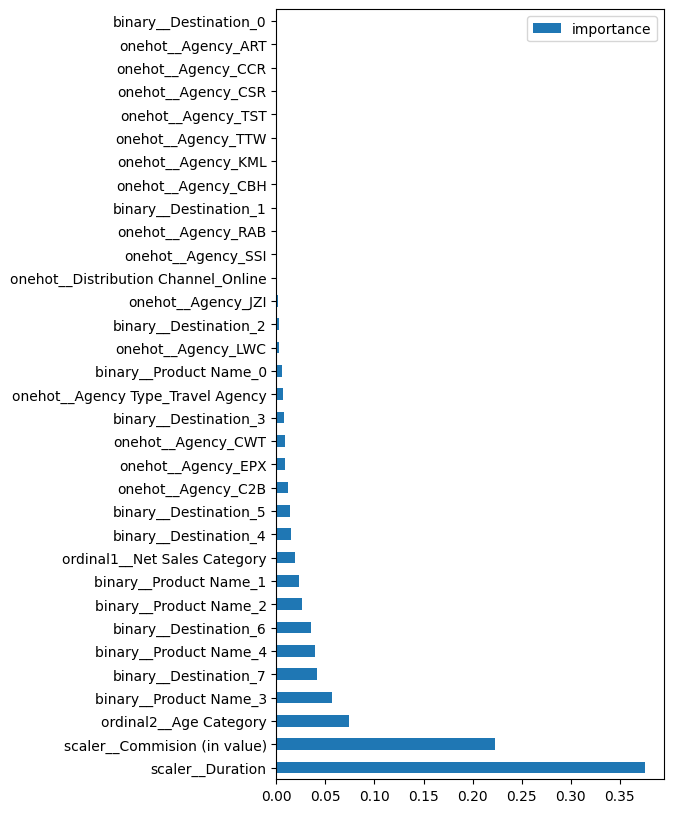

In [41]:
data = grid_search.best_estimator_.steps[-1][1].feature_importances_.tolist()
col = x_train_prep.columns.tolist()
df_importance = pd.DataFrame(data=data, index=col, columns=["importance"]).sort_values(
    by="importance", ascending=False
)
df_importance.plot(kind="barh", figsize=(5,10));

From the chart, we can see that Duration, Commision, and Age Category has the most importance compared to other variables. This could be the key in determining insurance product price or directing marketing strategy based on those categories.

---

> ## Saving Best Model

In [42]:
def prep(df):
    df['Claim'] = np.where(df['Claim']=='Yes', 1, 0)
    df.drop(df[df['Age']>100].index, inplace=True)
    df.drop(df[df['Duration']<0].index, inplace=True)
    df.drop(columns=['Gender'], inplace=True)
    df.drop_duplicates(inplace=True)
    df['Net Sales Category'] = pd.cut(df['Net Sales'], bins = [-float('inf'), 0, 100, 400, float('inf')], labels = ['Discount','Low Sales','General Sales','High Sales'])
    df['Age Category'] = pd.cut(df['Age'], bins = [-1,10,26,42,58,77,float('inf')], labels = ['Gen Alpha','Gen Z','Millenial','Gen X','Baby Boomer','Silent Gen'])
    df.drop(columns=['Net Sales','Age'], inplace=True)

In [43]:
import pickle

filename = 'model.sav'
pickle.dump(grid_search.best_estimator_, open(filename,'wb'))

filename = 'preparation.sav'
pickle.dump(prep, open(filename,'wb'))

> ## Conclusion

From the result above, we can see that we are able to reduce our FN numbers:
1. No imbalance handling: 132 FN with Test Recall 0.1% and Train Recall 6%
1. Imbalance handling: 18 FN with Test Recall 86% and Train Recall 87%
1. Imbalance handling + tuning: 17 FN with Test Recall 87% and Train Recall 87%

Our last result is used for our final model. But to note, the data needs to be prepared first such as binning Age & Net Sales data. From this model, we can expect a new strategic marketing plan based on the most important features, which are Duration, Commision, and Age Category. These can be used to fine tune our sales numbers. 

On top of that, from the model, we can predict 87% if customer is going to do claim correctly. These can also be used to determine our pricing. To understand better, we can see the calculation example as follows. Currently the company gives out flat price for all customers.

Assume there's 1000 customers and our regular price is $300 and premium price is $400. 20 people is going to file for travel insurance claim worth $5000. Insurance price typically ranges around 6% from trip price and in this case, we assume $5000 is a full coverage reimbursement from the trip price.
1. Scenario 1: Flat price
    * A = $300 x 1,000 customers = $300,000
    * B = $5,000 x 20 customers = $100,000
    * Company's Gross Profit = A - B = $200,000
2. Scenario 2: Leveled Price (580 cusomers predicted no claim, 420 customers predicted claim, 20 customers actual claim)
    * A = $300 x 580 customers = $174,000
    * B = $400 x 420 customers = $168,000
    * C = $5,000 x 20 customers = $100,000
    * Company's Gross Profit = A + B - C = $242,000

With the simple generalized calculation as above, we can potentially improve our GP by 21%. With better pricing and marketing strategy the numbers are bound to improve more.

---

> ## Recommendation

With the model result and potential profit growth, our recommendations are:
1. Add more detailed data on Trip Price and Sales Date. Trip price would make our Net Sales data more sensible since the sales are typically linked with the trip price. Date would also give us a sense of when is the best time to offer and do huge marketing for our products.
1. Use other modelling method and do a detailed hyperparameter tuning using Grid Search so we can be sure that the result is the best outcome.
1. The current model is limited to the available variables from the dataset, hence if there's any addition to the dataset, remodel is a proper action.
1. Create model comparison using another perspective such as optimizing Precision score to ensure our price stays competitive in the market.